In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw5.ipynb")

# CPSC 330 - Applied Machine Learning 

## Homework 5: Putting it all together 
### Associated lectures: All material till lecture 13 

**Due date: [Monday, Mar 10, 11:59 pm](https://github.com/UBC-CS/cpsc330-2024W2?tab=readme-ov-file#deliverable-due-dates-tentative)**

## Table of contents
0. [Submission instructions](#si)
1. [Understanding the problem](#1)
2. [Data splitting](#2)
3. [EDA](#3)
4. [Feature engineering](#4)
5. [Preprocessing and transformations](#5) 
6. [Baseline model](#6)
7. [Linear models](#7)
8. [Different models](#8)
9. [Feature selection](#9)
10. [Hyperparameter optimization](#10)
11. [Interpretation and feature importances](#11) 
12. [Results on the test set](#12)
13. [Summary of the results](#13)
14. [Your takeaway from the course](#15)

<div class="alert alert-info">

## Submission instructions
<hr>
rubric={points:4}

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 2. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).
- If you would like to use late tokens for the homework, all group members must have the necessary late tokens available. Please note that the late tokens will be counted for all members of the group.   


Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2024W2/blob/master/docs/homework_instructions.md). 

1. Before submitting the assignment, run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Follow the [CPSC 330 homework instructions](https://ubc-cs.github.io/cpsc330-2024W2/docs/homework_instructions.html), which include information on how to do your assignment and how to submit your assignment.
4. Upload your solution on Gradescope. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope.


_Note: The assignments will get gradually more open-ended as we progress through the course. In many cases, there won't be a single correct solution. Sometimes you will have to make your own choices and your own decisions (for example, on what parameter values to use when they are not explicitly provided in the instructions). Use your own judgment in such cases and justify your choices, if necessary._

</div>

<!-- BEGIN QUESTION -->

## Imports

<div class="alert alert-warning">
    
Imports
    
</div>

_Points:_ 0

In [2]:
import sys
print(sys.executable)


c:\Users\emma\anaconda3\envs\cpsc330\python.exe


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shap

from sklearn.dummy import DummyRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, cross_validate, train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.discriminant_analysis import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import root_mean_squared_error
from sklearn.feature_selection import RFECV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

# Set default font size for plots
plt.rcParams["font.size"] = 16


<!-- END QUESTION -->

## Introduction <a name="in"></a>

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (15-20 hours???) is a good guideline for this project . Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>
<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
<hr>
rubric={points:3}

In this mini project, you have the option to choose on which dataset you will be working on. The tasks you will need to carry on will be similar, independently of your choice.

### Option 1
You can choose to work on a classification problem of predicting whether a credit card client will default or not. 
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 


### Option 2
You can choose to work on a regression problem using a [dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data) of New York City Airbnb listings from 2019. As usual, you'll need to start by downloading the dataset, then you will try to predict `reviews_per_month`, as a proxy for the popularity of the listing. Airbnb could use this sort of model to predict how popular future listings might be before they are posted, perhaps to help guide hosts create more appealing listings. In reality they might instead use something like vacancy rate or average rating as their target, but we do not have that available here.

> Note there is an updated version of this dataset with more features available [here](http://insideairbnb.com/). The features were are using in `listings.csv.gz` for the New York city datasets. You will also see some other files like `reviews.csv.gz`. For your own interest you may want to explore the expanded dataset and try your analysis there. However, please submit your results on the dataset obtained from Kaggle.


**Your tasks:**

1. Spend some time understanding the options and pick the one you find more interesting (it may help spending some time looking at the documentation available on Kaggle for each dataset).
2. After making your choice, focus on understanding the problem and what each feature means, again using the documentation on the dataset page on Kaggle. Write a few sentences on your initial thoughts on the problem and the dataset. 
3. Download the dataset and read it as a pandas dataframe. 

<div class="alert alert-warning">
    
Solution_1
    
</div>

_Points:_ 3

**Initial thoughts:** 


I think there are several variables that will correlate with how popular a listing is, for example location and price. The dataset also need some preprocessing, for example choosing which variable that represents location (out of latitide+longitude, neighbourhood and neighbourhood_group) and perhaps removing varibles that directly relates to the target(number_of_reviews naturally relates to reviews_per_month).


I defintly think there are more factors that is important for a listing to have many reviews, like amount or quality of images, and average rating, so it will be interesting to see if I get some meaningful results in this project. 

In [4]:
ny_dataset = pd.read_csv('data/AB_NYC_2019.csv')
ny_dataset.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting <a name="2"></a>
<hr>
rubric={points:2}

**Your tasks:**

1. Split the data into train (70%) and test (30%) portions with `random_state=123`.

> If your computer cannot handle training on 70% training data, make the test split bigger.  

<div class="alert alert-warning">
    
Solution_2
    
</div>

_Points:_ 2

In [5]:
ny_dataset["reviews_per_month"] = ny_dataset["reviews_per_month"].fillna(0)

y = ny_dataset["reviews_per_month"].fillna(0)
X = ny_dataset.drop("reviews_per_month", axis='columns')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 3. EDA <a name="3"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

<div class="alert alert-warning">
    
Solution_3
    
</div>

_Points:_ 10

We made 3 summary tables and 2 plots. For each summary and plot, there is an comment below. The (additional) first table is just the dataframe of the training set.

In [6]:
# concat X-train and y_train into one training set, to use features and corresponding target in the same plots
training_set_for_eda = pd.concat([X_train, y_train], axis='columns')
training_set_for_eda.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,calculated_host_listings_count,availability_365,reviews_per_month
36150,28736148,Cozy 1 Bedroom Apt in Hamilton Heights,43431867,Tommy,Manhattan,Washington Heights,40.83256,-73.94440,Entire home/apt,96,4,0,NaN,1,17,0.0
45223,34613254,Amazing One Bedroom at the Time Square Area/72B,48146336,Irina,Manhattan,Hell's Kitchen,40.76134,-73.99299,Entire home/apt,150,30,0,NaN,20,332,0.0
14316,11144496,"New Spacious Master, Williamsburg",48819868,Nick,Brooklyn,Williamsburg,40.71119,-73.95097,Private room,200,1,0,NaN,1,0,0.0


In [7]:
# Summary of the training set to get an overview f the data and values
nyc_summary = training_set_for_eda.describe(include='all')
nyc_summary

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,calculated_host_listings_count,availability_365,reviews_per_month
count,3.422600e+04,34216,3.422600e+04,34209,34226,34226,34226.000000,34226.000000,34226,34226.000000,34226.000000,34226.000000,27236,34226.000000,34226.000000,34226.000000
unique,NaN,33662,NaN,9201,5,218,NaN,NaN,3,NaN,NaN,NaN,1676,NaN,NaN,NaN
top,NaN,Home away from home,NaN,David,Manhattan,Williamsburg,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2019-06-23,NaN,NaN,NaN
freq,NaN,14,NaN,292,15176,2728,NaN,NaN,17848,NaN,NaN,NaN,984,NaN,NaN,NaN
mean,1.893979e+07,NaN,6.726273e+07,NaN,NaN,NaN,40.729142,-73.952083,NaN,151.528399,7.094957,23.244814,NaN,7.042453,112.526004,1.090058
std,1.101332e+07,NaN,7.840511e+07,NaN,NaN,NaN,0.054531,0.046201,NaN,236.628392,21.548290,44.573323,NaN,32.590803,131.420031,1.614532
min,2.539000e+03,NaN,2.438000e+03,NaN,NaN,NaN,40.506410,-74.244420,NaN,0.000000,1.000000,0.000000,NaN,1.000000,0.000000,0.000000
25%,9.394482e+06,NaN,7.721897e+06,NaN,NaN,NaN,40.690193,-73.983030,NaN,69.000000,1.000000,1.000000,NaN,1.000000,0.000000,0.040000
50%,1.954546e+07,NaN,3.074526e+07,NaN,NaN,NaN,40.723240,-73.955550,NaN,106.000000,3.000000,5.000000,NaN,1.000000,45.000000,0.370000
75%,2.915085e+07,NaN,1.068375e+08,NaN,NaN,NaN,40.763287,-73.936270,NaN,175.000000,5.000000,23.000000,NaN,2.000000,225.750000,1.570000


From the summary statistics above we can learn several things about the training set, among others we have:

- It shows that there are many unique values in the features `name` and `host_name`. Making each unique value into a category will not give much pattern to learn from. Without feature engineering on these variables, they can probably be dropped.
- It alos shows the mean of the target `reviews_per_month` being 1.09
- Manhattan is the mot common neighbourhood group among all listings
- There are some skewness in the target value

In [8]:
missing_values = training_set_for_eda.isna().sum()
pd.DataFrame(missing_values)

,0
id,0
name,10
host_id,0
host_name,17
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


We see that most features has no missing values, while `last_review` have quite a few. Those missing values might indicate that the listing has never been reviewed before.

In [9]:
# Find the 10 neighbourhoods with the highest average of reviews_per_month
top_10_neighbourhoods = training_set_for_eda.groupby('neighbourhood')["reviews_per_month"].mean().nlargest(10).reset_index()
# Merge to also see the belonging neighbourhood groups
top_10_neighbourhoods = top_10_neighbourhoods.merge(
    training_set_for_eda[["neighbourhood", "neighbourhood_group"]].drop_duplicates(),
    on="neighbourhood",
    how="left"
)
top_10_neighbourhoods

,neighbourhood,reviews_per_month,neighbourhood_group
0,East Elmhurst,4.635630,Queens
1,Springfield Gardens,4.625424,Queens
2,Silver Lake,4.340000,Staten Island
3,Jamaica Hills,3.790000,Queens
4,Woodlawn,3.261429,Bronx
5,Huguenot,3.235000,Staten Island
6,New Dorp Beach,3.110000,Staten Island
7,Schuylerville,3.065455,Bronx
8,Queens Village,3.052000,Queens
9,Neponsit,2.880000,Queens


The table above shows the top 10 most neighbourhoods with the highest average of `reviews_per_month`. It is a big range from 4.64 on the top to 2.88 on 10th place. Queens seem to be the the most popular neighbourhood group.

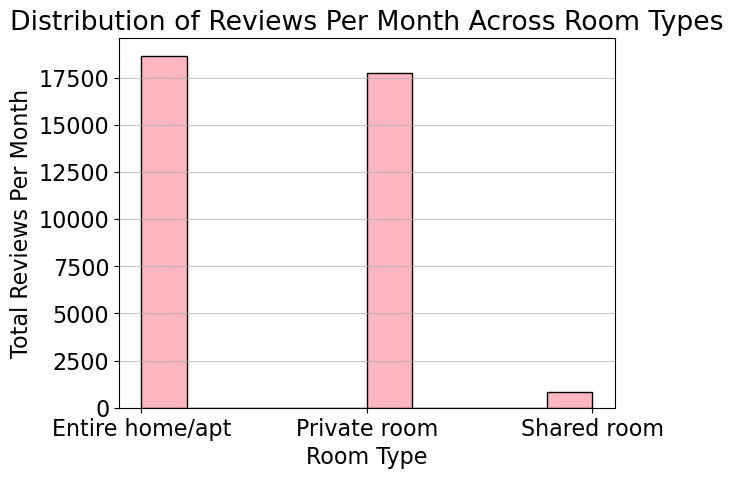

In [10]:
plt.hist(
    training_set_for_eda["room_type"], 
    weights=training_set_for_eda["reviews_per_month"], 
    edgecolor="black", 
    color="lightpink"
)
plt.xlabel("Room Type")
plt.ylabel("Total Reviews Per Month")
plt.title("Distribution of Reviews Per Month Across Room Types")
plt.grid(axis="y", linestyle="-", alpha=0.7)
plt.show()

There are only 3 room types (and no missing values). In terms of total reviews per month, Entire home/apt and Private Room is almost as popular as each other. What this plot do not show is how many listings there are of each type(there might be very fem shared rooms, in that case explaing why it is not as popular). It also does not show whether a few popular listings drags up the total score, or if ti is evely distributed among the room types.

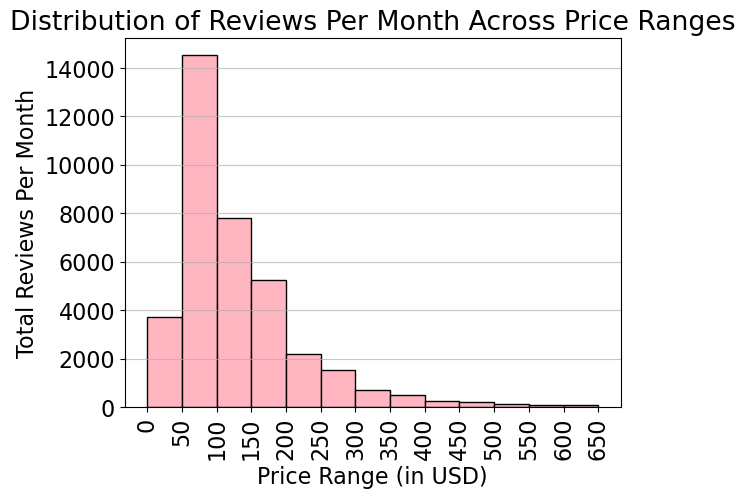

In [11]:
price_bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650]
plt.hist(
    training_set_for_eda["price"], 
    bins=price_bins,
    weights=training_set_for_eda["reviews_per_month"], 
    edgecolor="black", 
    color="lightpink"
)
plt.xlabel("Price Range (in USD)")
plt.ylabel("Total Reviews Per Month")
plt.title("Distribution of Reviews Per Month Across Price Ranges")
plt.xticks(price_bins, rotation=90)
plt.grid(axis="y", linestyle="-", alpha=0.7)
plt.show()

The plot above shows that the price range 50-100 has the highest average of reviews per month, indicating that this is pupular price range for the listings.

**Total summary:**
 
As we initially thought, price and neighbourhood seem to correalte to the listings popularity. We tried to make line plots and scatter plots with the numerical features, but did not see a pattern (which is why these plots are not included in our EDA). Neighbourhood and neighboorhood group obviously correlates, but the former has 218 uniqe values, while the latter has only 5. Keeping `neighboorhood` and using One-Hot-Encoding will create over 200 new columns and possibly lead to curse of dimensionality and overfitting, and it will defintly make the models slower. Therefor, we decide to only keep `neighbourhood_groups`.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 4. Feature engineering <a name="4"></a>
<hr>
rubric={points:1}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing. 

<div class="alert alert-warning">
    
Solution_4
    
</div>

_Points:_ 1

<!-- END QUESTION -->

<br><br>

In [12]:

#new feature: the number of days since the last review
X_train['last_review'] = pd.to_datetime(X_train['last_review'])
today = pd.to_datetime('2025-03-11 14:20:46.963913')
X_train['days_since_last_review'] = (today - X_train['last_review']).dt.days

#new feature: the number of words in the name of the listing
X_train["word_count"] = X_train['name'].apply(lambda x: len(str(x).split()))

#log transform the reviews_per_month column (y) due to skewness
y_train = np.log1p(y_train)

#apply feature engineering on test set as well
X_test['last_review'] = pd.to_datetime(X_test['last_review'])
X_test['days_since_last_review'] = (today - X_test['last_review']).dt.days
X_test["word_count"] = X_test['name'].apply(lambda x: len(str(x).split()))
y_test = np.log1p(y_test)


<!-- BEGIN QUESTION -->

## 5. Preprocessing and transformations <a name="5"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

<div class="alert alert-warning">
    
Solution_5
    
</div>

_Points:_ 10

In [13]:
num_features = ['price', 'minimum_nights', 'calculated_host_listings_count', 'availability_365', 'days_since_last_review', 'word_count']
cat_features = ['neighbourhood_group', 'neighbourhood', 'room_type']
drop_features = ['id', 'host_id', 'latitude', 'longitude','number_of_reviews', 'last_review', 'name', 'host_name']

In [14]:
numerical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

col_transformer = make_column_transformer(
    (numerical_transformer, num_features),
    (categorical_transformer, cat_features,),
    ("drop", drop_features)
)

<!-- BEGIN QUESTION -->

## 6. Baseline model <a name="6"></a>
<hr>
rubric={points:2}

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

<div class="alert alert-warning">
    
Solution_6
    
</div>

_Points:_ 2

In [16]:
X_train_transformed = col_transformer.fit_transform(X_train)

baseline_model = DummyRegressor(strategy="mean")

dummy_cv = cross_validate(
    estimator=baseline_model,
    X=X_train_transformed, 
    y=y_train,
    cv=5,
    scoring="neg_root_mean_squared_error",  
    return_train_score=True)

dummy_cv_results = pd.DataFrame(dummy_cv)

# Convert negative RMSE to positive
dummy_cv_results["test_score"] = -dummy_cv_results["test_score"]
dummy_cv_results["train_score"] = -dummy_cv_results["train_score"]
 
print(pd.DataFrame(dummy_cv_results))

   fit_time  score_time  test_score  train_score
0  0.020528         0.0    0.580701     0.576051
1  0.013573         0.0    0.578874     0.576511
2  0.012142         0.0    0.572584     0.578080
3  0.013956         0.0    0.577904     0.576755
4  0.016436         0.0    0.574866     0.577516


The score is consistent across folds. Test and training score is close to similar, with RMSE around 0.57

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 7. Linear models <a name="7"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.

<div class="alert alert-warning">
    
Solution_7
    
</div>

_Points:_ 10

In [21]:

ridge_pipeline = make_pipeline(
    col_transformer,  
    Ridge(random_state=123) 
)

ridge_pipeline.fit(X_train, y_train)

ridge_cv_scores = cross_validate(
    ridge_pipeline, X_train, y_train, cv=5, scoring="neg_root_mean_squared_error", return_train_score=True
)

ridge_cv_results = pd.DataFrame(ridge_cv_scores)

# Convert negative RMSE to positive
ridge_cv_results["test_score"] = -ridge_cv_results["test_score"]
ridge_cv_results["train_score"] = -ridge_cv_results["train_score"]

print(pd.DataFrame(ridge_cv_results))



   fit_time  score_time  test_score  train_score
0  0.134028    0.023786    0.480188     0.476865
1  0.150555    0.030589    0.483373     0.475879
2  0.158599    0.029181    0.477014     0.477620
3  0.150223    0.030544    0.479141     0.477097
4  0.149547    0.031886    0.484239     0.476109


In [22]:

# Calculate mean and standard deviation for test RMSE
mean_rmse = ridge_cv_results["test_score"].mean()
std_rmse = ridge_cv_results["test_score"].std()

print(f"Mean RMSE: {mean_rmse:.4f}")
print(f"Standard Deviation: {std_rmse:.4f}")


Mean RMSE: 0.4808
Standard Deviation: 0.0030


In [23]:
param_grid = {"ridge__alpha": [0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(ridge_pipeline, param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_alpha = grid_search.best_params_["ridge__alpha"]
best_score = -grid_search.best_score_


print(f"Best alpha: {best_alpha}")
print(f"Best CV RMSE: {best_score:.4f}")

Best alpha: 10
Best CV RMSE: 0.4803


In [24]:

cv_results = pd.DataFrame(grid_search.cv_results_)

cv_summary = cv_results[["param_ridge__alpha", "mean_test_score", "std_test_score"]].copy()

cv_summary.loc[:, "mean_test_score"] = -cv_summary["mean_test_score"]

print(cv_summary)


   param_ridge__alpha  mean_test_score  std_test_score
0                0.01         0.481088        0.002679
1                0.10         0.481044        0.002676
2                1.00         0.480791        0.002680
3               10.00         0.480321        0.002799
4              100.00         0.480912        0.003108


From the ridge cross validation score, we could see that the RMSE was 0.1986 with the default parameter. After testing with other alpha values, we found that using alpha = 10 gave a slightly better RMSE score of 0.1984. Standard deviation is low, showing that the performance of the model is consistent.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Different models <a name="8"></a>
<hr>
rubric={points:12}

**Your tasks:**
1. Try at least 3 other models aside from a linear model. One of these models should be a tree-based ensemble model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model? 

<div class="alert alert-warning">
    
Solution_8
    
</div>

_Points:_ 12

In [25]:
#decision tree

tree_pipeline = make_pipeline(
    col_transformer,
    DecisionTreeRegressor(random_state=123)
)
tree_cv_scores = cross_validate(
    tree_pipeline, X_train, y_train, cv=5, scoring="neg_root_mean_squared_error", return_train_score=True
)

tree_cv_results = pd.DataFrame(tree_cv_scores)

# Convert negative RMSE to positive
tree_cv_results["test_score"] = -tree_cv_results["test_score"]
tree_cv_results["train_score"] = -tree_cv_results["train_score"]


print(pd.DataFrame(tree_cv_results))

   fit_time  score_time  test_score  train_score
0  0.526141    0.028856    0.408770     0.002387
1  0.565728    0.028497    0.409741     0.001755
2  0.582549    0.028878    0.404056     0.002382
3  0.594083    0.017928    0.398833     0.001716
4  0.561385    0.024909    0.407931     0.002325


In [ ]:
#Support Vector Regression (SVR)

# Sample only 5,000 rows for training SVR. This is beacuse it takes to long to run with the whole dataset
X_train_sample = X_train[:5000]
y_train_sample = y_train[:5000]

svm_pipeline = make_pipeline(
    col_transformer,
    SVR(kernel="linear", C=1.0) 
)

svm_cv_scores = cross_validate(
    svm_pipeline, X_train_sample, y_train_sample, cv=5, scoring="neg_root_mean_squared_error", return_train_score=True
)

svm_cv_results = pd.DataFrame(svm_cv_scores)

# Convert negative RMSE to positive
svm_cv_results["test_score"] = -svm_cv_results["test_score"]
svm_cv_results["train_score"] = -svm_cv_results["train_score"]

print(svm_cv_results)


   fit_time  score_time  test_score  train_score
0  2.909572    0.383766    0.500764     0.486651
1  2.850206    0.380677    0.505328     0.485679
2  2.737875    0.349955    0.485701     0.487007
3  2.981548    0.401907    0.527472     0.480257
4  2.986843    0.344380    0.534872     0.485830


In [ ]:
#K Nearest Regressor (KNR)


knr_pipeline = make_pipeline(
    col_transformer,
    KNeighborsRegressor()  
)

knr_cv_scores = cross_validate(
    knr_pipeline, X_train, y_train, cv=5, scoring="neg_root_mean_squared_error", return_train_score=True
)

knr_cv_results = pd.DataFrame(knr_cv_scores)

# Convert negative RMSE to positive
knr_cv_results["test_score"] = -knr_cv_results["test_score"]
knr_cv_results["train_score"] = -knr_cv_results["train_score"]

print(knr_cv_results)


   fit_time  score_time  test_score  train_score
0  0.088292    1.200539    0.401876     0.325599
1  0.105015    1.098928    0.410787     0.325364
2  0.103913    1.075979    0.397756     0.326608
3  0.091400    1.124861    0.399806     0.325503
4  0.101113    1.069625    0.400254     0.324576


In [28]:
results_dict = {
    "Model": ["Decision Tree", "SVM", "KNR"],
    "Test Mean RMSE": [
        tree_cv_results["test_score"].mean(),
        svm_cv_results["test_score"].mean(),
        knr_cv_results["test_score"].mean()
    ],
    "Test Std RMSE": [
        tree_cv_results["test_score"].std(),
        svm_cv_results["test_score"].std(),
        knr_cv_results["test_score"].std()
    ],
    "Train Mean RMSE": [
        tree_cv_results["train_score"].mean(),
        svm_cv_results["train_score"].mean(),
        knr_cv_results["train_score"].mean()
    ]
}

results_df = pd.DataFrame(results_dict)
results_df

,Model,Test Mean RMSE,Test Std RMSE,Train Mean RMSE
0,Decision Tree,0.405866,0.004485,0.002113
1,SVM,0.510827,0.020113,0.485085
2,KNR,0.402096,0.005076,0.325530


1. Decision tree
    - The error in the training score is close to 0 (0.00096) while the error in the test score is around 0.15. The shows extreme overfitting of the training data. The model trains very well on training data, but does not translate as well to the test data, showing bad genralization. It still performs better on the test data than the linear model
2. SVR
    - The training score and testing score are about the same (around 0.197 for training score and around 0.207 for test score). The difference could be due to a slight overfit.
    - It is worth noting that the model might would have performed better if it was trained on the whole teaining set.
3. KNR
    - The KNR has a smaller error in the training score (around 0.127) compared to the test score (around 0.157) which also points to slight overfitting. 


They all perform better than the baseline model. The Decision tree and KNR also performs better than the Linear Ridge model.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 9. Feature selection <a name="9"></a>
<hr>
rubric={points:2}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV` or forward selection for this. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises. 

<div class="alert alert-warning">
    
Solution_9
    
</div>

_Points:_ 2

In [29]:


ridge_model = Ridge(alpha=10, random_state=123)

X_train_transformed = col_transformer.fit_transform(X_train)
X_test_transformed = col_transformer.transform(X_test)

rfecv = RFECV(
    estimator=ridge_model,
    step=1, 
    cv=5,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1
)

X_train_rfecv = rfecv.fit_transform(X_train_transformed, y_train)
X_test_rfecv = rfecv.transform(X_test_transformed)


new_ridge_cv_scores = cross_validate(
    ridge_model,
    X_train_rfecv,
    y_train,
    cv=5,
    scoring="neg_root_mean_squared_error",
    return_train_score=True
)

new_ridge_cv_results = pd.DataFrame(new_ridge_cv_scores)

# Convert negative RMSE to positive values
new_ridge_cv_results["test_score"] = -new_ridge_cv_results["test_score"]
new_ridge_cv_results["train_score"] = -new_ridge_cv_results["train_score"]

print(new_ridge_cv_results)


   fit_time  score_time  test_score  train_score
0  0.082073    0.004000    0.479434     0.477510
1  0.081095    0.004629    0.482633     0.476613
2  0.074881    0.004016    0.475872     0.478295
3  0.073429    0.003753    0.478299     0.477725
4  0.072920    0.004009    0.483502     0.476577


In [30]:
mean_rmse_new = new_ridge_cv_results["test_score"].mean()
std_rmse_new = new_ridge_cv_results["test_score"].std()

print(f"Mean RMSE: {mean_rmse_new:.4f}")
print(f"Standard Deviation: {std_rmse_new:.4f}")

Mean RMSE: 0.4799
Standard Deviation: 0.0031


In [31]:
ridge_pipeline = Pipeline([
    ("preprocessing", col_transformer),
    ("feature_selection", rfecv), 
    ("model", ridge_model) 
])

In the previous ridge model, the mean RMSE was 0.1984. Feature selection shows a nice improvment with new mean RMSE of 0.1243. Which is why we added the feature selection to the pipeline.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Hyperparameter optimization <a name="10"></a>
<hr>
rubric={points:10}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

<div class="alert alert-warning">
    
Solution_10
    
</div>

_Points:_ 10

For the following tasks, we will be using the dataset that went through feature selection in the previous task, called X_train_rfecv.

In [32]:
#decision tree

param_grid_dt = {
    "max_depth": [3, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [10, 20, 50, 100]
}

grid_search_dt = GridSearchCV(
    DecisionTreeRegressor( random_state=123),
    param_grid_dt,
    cv=5,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1
)

grid_search_dt.fit(X_train_rfecv, y_train)

print(f"Best Parameters (Decision Tree): {grid_search_dt.best_params_}")
print(f"Best RMSE: {-grid_search_dt.best_score_:.4f}")


Best Parameters (Decision Tree): {'max_depth': 10, 'min_samples_leaf': 100, 'min_samples_split': 2}
Best RMSE: 0.3023


In [33]:
# SVR

param_grid_svr = {
    "C": [0.001, 0.1, 1, 10],
}

random_search_svr = GridSearchCV(
    SVR(),
    param_grid_svr, 
    cv=5,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1
)

#have to sample because it takes too long to run the whole dataset
X_train_rfecv_sample = X_train_rfecv[:5000]
y_train_sample = y_train[:5000]

random_search_svr.fit(X_train_rfecv_sample, y_train_sample)

print(f"Best Parameters (SVR): {random_search_svr.best_params_}")
print(f"Best RMSE: {-random_search_svr.best_score_:.4f}")



Best Parameters (SVR): {'C': 1}
Best RMSE: 0.3543


In [34]:
#KNR
param_grid_knn = {
    "n_neighbors": [5, 10, 20, 50]
}

grid_search_knn = GridSearchCV(
    KNeighborsRegressor(),
    param_grid_knn,
    cv=5,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1
)

grid_search_knn.fit(X_train_rfecv, y_train)

print(f"Best Parameters (KNR): {grid_search_knn.best_params_}")
print(f"Best RMSE: {-grid_search_knn.best_score_:.4f}")

Best Parameters (KNR): {'n_neighbors': 10}
Best RMSE: 0.3872


In [35]:
#ridge model with the relevant features
param_grid_ridge = {"alpha": [0.01, 0.1, 1, 10, 20, 50]}

grid_search_ridge = GridSearchCV(Ridge(), param_grid_ridge, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)

grid_search_ridge.fit(X_train_rfecv, y_train)

best_alpha = grid_search_ridge.best_params_
best_score = -grid_search_ridge.best_score_


print(f"Best alpha: {best_alpha}")
print(f"Best CV RMSE: {best_score:.4f}")

Best alpha: {'alpha': 10}
Best CV RMSE: 0.4799


After optimizing the parameter of all the different models, the one that performs the best is the decision tree regression model. The one that performs the worst is the ridge model. With the paramter optimization, all the models performs better except for ridge that stays the same.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 11. Interpretation and feature importances <a name="1"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Use the methods we saw in class (e.g., `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 

<div class="alert alert-warning">
    
Solution_11
    
</div>

_Points:_ 10

The shap value plots are not very interpretable after going through preprocessing, feature engineering and selection. But we can make some observations based on three exampels:
- feature number 0-4 appears to be the most important features several times
- out of over 170 features, there are only a few at the top that adds to the predictions
- for a decision tree, this makes sense, since it only splits on maximum 10 features (in our best tree)

In [ ]:
best_tree = grid_search_dt.best_estimator_
best_tree.fit(X_train_rfecv, y_train)

explainer = shap.TreeExplainer(best_tree)
train_shap_values = explainer(X_train_rfecv) 


In [52]:
shap.initjs()

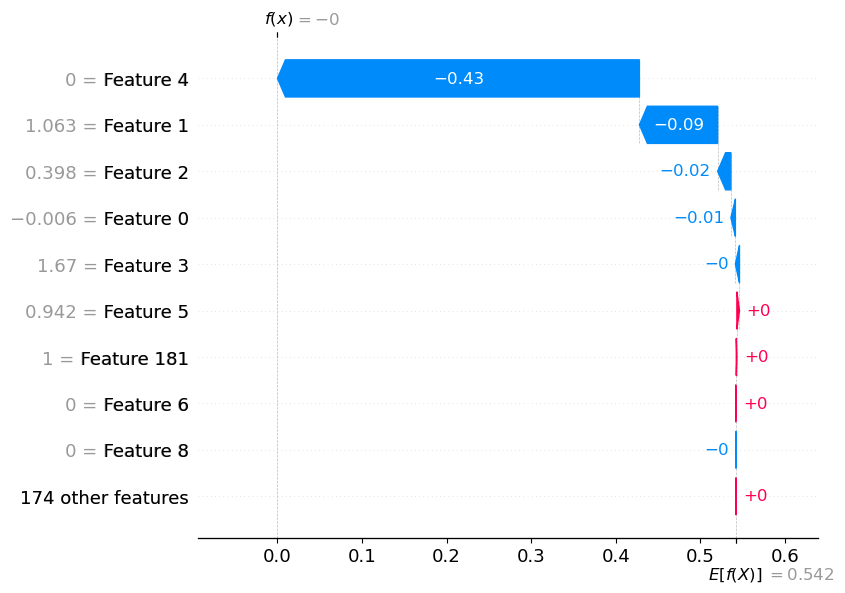

In [64]:
shap.plots.waterfall(train_shap_values[1])

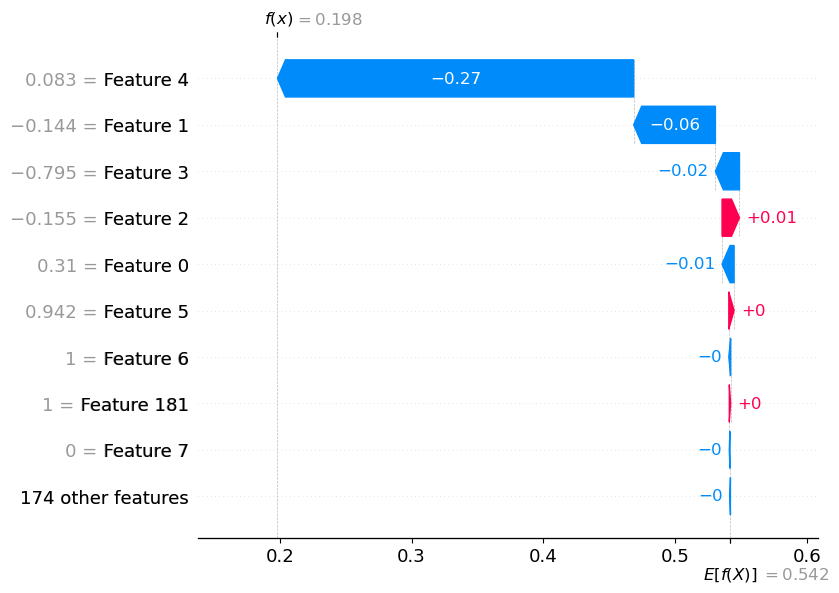

In [65]:
shap.plots.waterfall(train_shap_values[10])

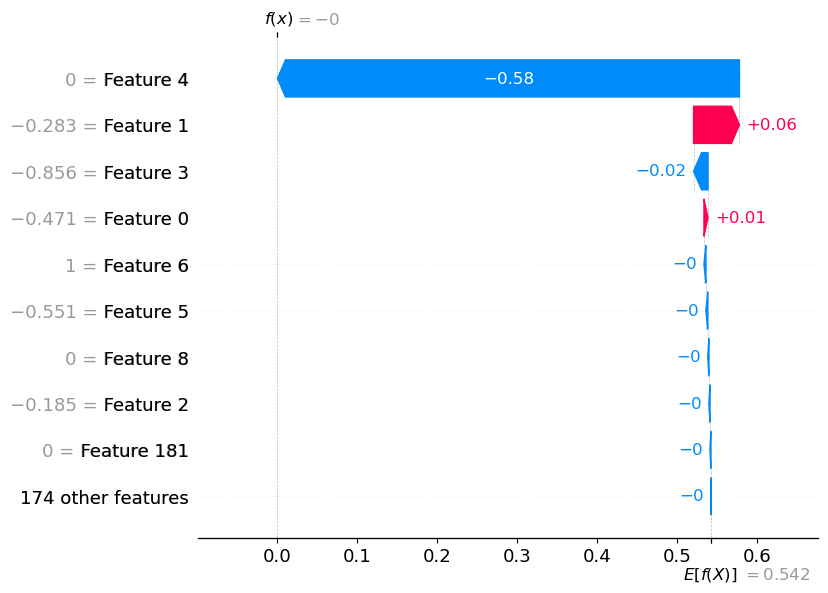

In [66]:
shap.plots.waterfall(train_shap_values[100])

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 12. Results on the test set <a name="12"></a>
<hr>

rubric={points:10}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain these individual predictions (e.g., with SHAP force plots).  

<div class="alert alert-warning">
    
Solution_12
    
</div>

_Points:_ 10

Best performing in terms of test score was Decision tree. But this was also the model where the cross validation results implied overfitting. The RMSE test score after predicting is 0.3040. This is a bit worse than the validation score (0.3023), but not completely off. The result alligns well with the cross validation scores, showing that the model likely are overfitted to the training data, but at the same time showed that the validation score was a decent estimator.

Shap values for predictions (adding on to the observation from previous task):
- feature 0-4 are still important, showing that the model learned these features well
- generally, there are a few more feature contributing to the shap values of the predictions. This shows that when predictiong test data, the model have to search a bit deeper than for the training data in these exact examples

In [ ]:
y_pred = best_tree.predict(X_test_rfecv)

rmse = root_mean_squared_error(y_test, y_pred)
print(f"RMSE: {rmse:.4f}")



RMSE: 0.3040


In [67]:
test_shap_values = explainer(X_test_rfecv) 

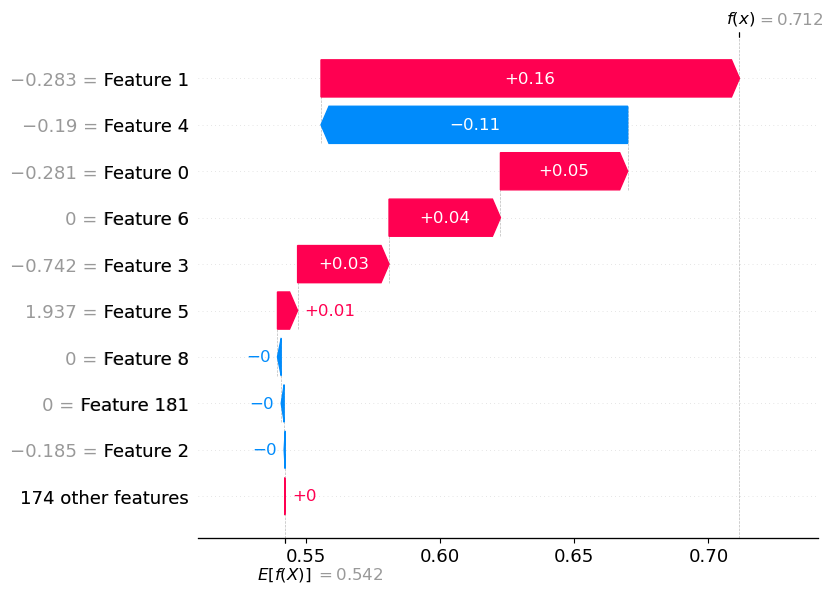

In [71]:
shap.plots.waterfall(test_shap_values[1])

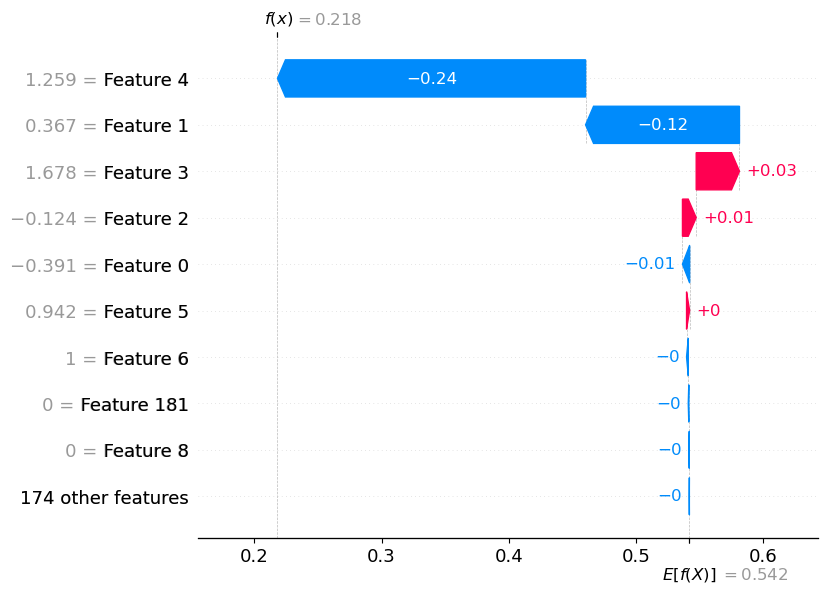

In [72]:
shap.plots.waterfall(test_shap_values[10])

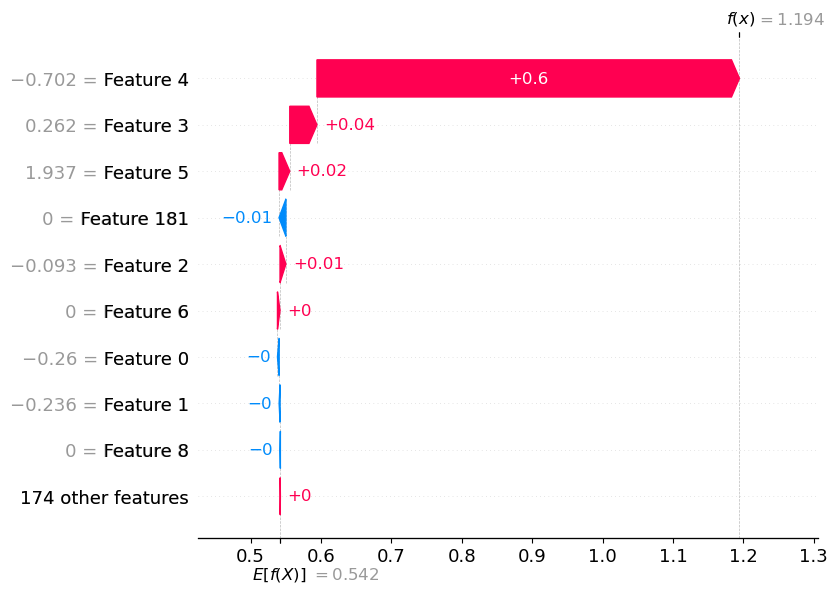

In [73]:
shap.plots.waterfall(test_shap_values[100])

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 13. Summary of results <a name="13"></a>
<hr>
rubric={points:12}

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook in the [Submission instructions section](#si).

<div class="alert alert-warning">
    
Solution_13
    
</div>

_Points:_ 12

_Type your answer here, replacing this text._

In [ ]:
...

<!-- END QUESTION -->

<br><br>

<br><br>

<!-- BEGIN QUESTION -->

## 14. Your takeaway <a name="15"></a>
<hr>
rubric={points:2}

**Your tasks:**

What is your biggest takeaway from the supervised machine learning material we have learned so far? Please write thoughtful answers.  

<div class="alert alert-warning">
    
Solution_14
    
</div>

_Points:_ 2

<!-- END QUESTION -->

<br><br>

**PLEASE READ BEFORE YOU SUBMIT:** 

When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
4. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope. 

This was a tricky one but you did it! 

![](img/eva-well-done.png)